<a href="https://colab.research.google.com/github/ROARMarketingConcepts/Machine-Learning-Projects/blob/master/Mall_Customer_Segmentation_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Mall Customer Segmentation Analysis

### Background

We own a supermarket mall and through membership cards , we have some basic data about our customers like Customer ID, age, gender, annual income and spending score. Spending Score is something we assign to each customer based on our defined parameters like customer behavior and purchasing data.

### Problem Statement 

We want to understand which customers can easily be converted (Target Customers) so that we can relay this information to the marketing team and plan the strategy accordingly.

### Inspiration

By the end of this analysis, we will be able to answer the following questions. 

1- How to achieve customer segmentation using machine learning algorithm (KMeans Clustering) in Python. 

2- Who are our target customers to whom we can start marketing? 


### Analysis performed by:

Ken Wood

Senior Marketing Strategist

ken@roarmarketingconcepts.com




---



### Mount the Google Drive where the dataset is located...

In [1]:
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [0]:
# !apt install proj-bin libproj-dev libgeos-dev
# !pip install git+https://github.com/thearn/pygmaps-extended
# !pip install gmplot

In [0]:
# !pip install https://github.com/matplotlib/basemap/archive/v1.1.0.tar.gz
# !sudo pip install -U git+https://github.com/matplotlib/basemap.git

### Install some necessary packages to perform the required analysis...

In [0]:
# !pip install -U scikit-learn
# !pip install --user --upgrade tables
# !sudo -H pip install seaborn==0.9.0

# !pip install pyproj

import pandas as pd
import numpy as np
import sklearn
import scipy
import calendar
from datetime import datetime as dt

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import interactive
from matplotlib import colors
from matplotlib.ticker import PercentFormatter
plt.rc("font", size=14)
from pylab import scatter, show, legend, xlabel, ylabel

# from mpl_toolkits.basemap import Basemap

import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

In [5]:
"""width = 28000000; lon_0 = -105; lat_0 = 40
m = Basemap(width=width,height=width,projection='aeqd',
            lat_0=lat_0,lon_0=lon_0)
# fill background.
m.drawmapboundary(fill_color='aqua')
# draw coasts and fill continents.
m.drawcoastlines(linewidth=0.5)
m.fillcontinents(color='coral',lake_color='aqua')
# 20 degree graticule.
m.drawparallels(np.arange(-80,81,20))
m.drawmeridians(np.arange(-180,180,20))
# draw a black dot at the center.
xpt, ypt = m(lon_0, lat_0)
m.plot([xpt],[ypt],'ko')
# draw the title.
plt.title('Azimuthal Equidistant Projection')
plt.show()"""

"width = 28000000; lon_0 = -105; lat_0 = 40\nm = Basemap(width=width,height=width,projection='aeqd',\n            lat_0=lat_0,lon_0=lon_0)\n# fill background.\nm.drawmapboundary(fill_color='aqua')\n# draw coasts and fill continents.\nm.drawcoastlines(linewidth=0.5)\nm.fillcontinents(color='coral',lake_color='aqua')\n# 20 degree graticule.\nm.drawparallels(np.arange(-80,81,20))\nm.drawmeridians(np.arange(-180,180,20))\n# draw a black dot at the center.\nxpt, ypt = m(lon_0, lat_0)\nm.plot([xpt],[ypt],'ko')\n# draw the title.\nplt.title('Azimuthal Equidistant Projection')\nplt.show()"

In [0]:
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

### Load the dataset...

In [0]:
df = pd.read_csv('/gdrive/My Drive/Colab Notebooks/Mall Customer Analysis/Mall_Customers.csv')

### Let's take a quick look at a few lines of the dataset...

In [8]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


### How many values in the dataset are missing?

In [9]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

### Let's use 'CustomerID' as the index for the dataset.

In [0]:
df.set_index('CustomerID',inplace=True)

### Let's color code the 'Gender' feature for plotting...

In [0]:
df['Gender Color'] = df.Gender.map({'Female':'#3498db', 'Male':'#9b59b6'})

In [12]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Gender Color
CustomerID,,,,,
1,Male,19,15,39,#9b59b6
2,Male,21,15,81,#9b59b6
3,Female,20,16,6,#3498db
4,Female,23,16,77,#3498db
5,Female,31,17,40,#3498db


In [13]:
df.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


In [0]:
df['Age Groups'] = pd.cut(df.Age,bins=[10, 20, 30, 40, 50, 60, 70],include_lowest=False)
df_plot1 = df.groupby(['Age Groups','Gender']).count().reset_index()
df_plot1.rename(columns={'Age':'Number'},inplace=True)

### Let's plot the number of males and females by age group.

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


Text(0.5, 1.0, 'Age Group Distribution by Gender')

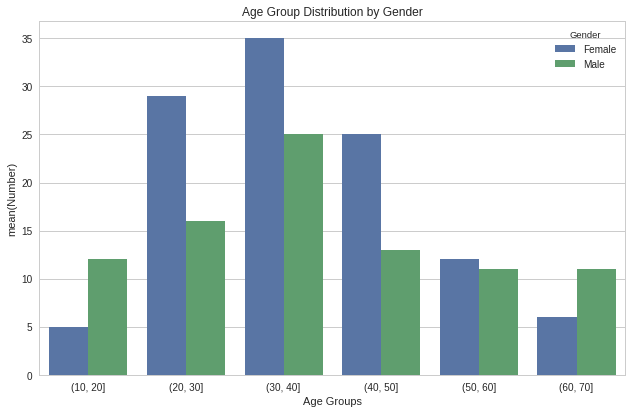

In [15]:
fig = plt.gcf()
fig.set_size_inches(10.5, 6.5)
ax = sns.barplot(x="Age Groups", y='Number', hue="Gender", data=df_plot1)
plt.title('Age Group Distribution by Gender')

### Let's plot the number of males and females by Annual Income.

In [0]:
df['Income Groups'] = pd.cut(df['Annual Income (k$)'],bins=[10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140],include_lowest=False)
df_plot2 = df.groupby(['Income Groups','Gender']).count().reset_index()
df_plot2.rename(columns={'Age':'Number'},inplace=True)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


Text(0.5, 1.0, 'Income Group Distribution by Gender')

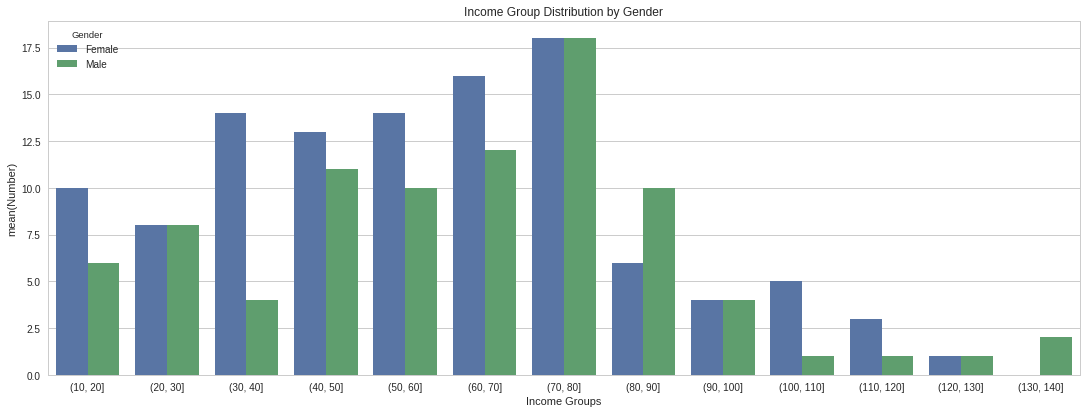

In [17]:
fig = plt.gcf()
fig.set_size_inches(18.5, 6.5)
ax = sns.barplot(x="Income Groups", y='Number', hue="Gender", data=df_plot2)
plt.title('Income Group Distribution by Gender')

### Let's plot the number of males and females by Spending Score.

In [0]:
df['Spending Score Groups'] = pd.cut(df['Spending Score (1-100)'],bins=[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100],include_lowest=False)
df_plot3 = df.groupby(['Spending Score Groups','Gender']).count().reset_index()
df_plot3.rename(columns={'Age':'Number'},inplace=True)


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


Text(0.5, 1.0, 'Spending Score Distribution by Gender')

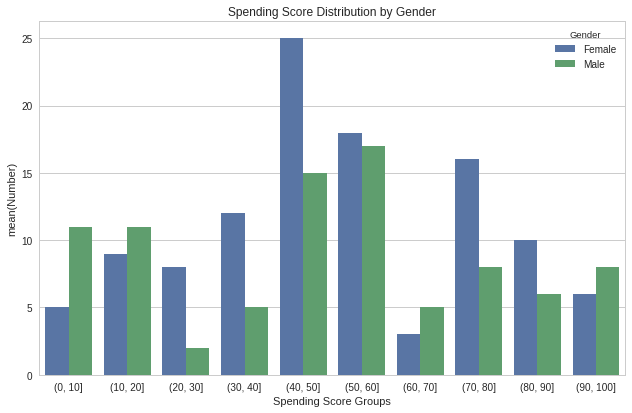

In [19]:
fig = plt.gcf()
fig.set_size_inches(10.5, 6.5)
ax = sns.barplot(x="Spending Score Groups", y='Number', hue="Gender", data=df_plot3)
plt.title('Spending Score Distribution by Gender')

In [20]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Gender Color,Age Groups,Income Groups,Spending Score Groups
CustomerID,,,,,,,,
1,Male,19,15,39,#9b59b6,"(10, 20]","(10, 20]","(30, 40]"
2,Male,21,15,81,#9b59b6,"(20, 30]","(10, 20]","(80, 90]"
3,Female,20,16,6,#3498db,"(10, 20]","(10, 20]","(0, 10]"
4,Female,23,16,77,#3498db,"(20, 30]","(10, 20]","(70, 80]"
5,Female,31,17,40,#3498db,"(30, 40]","(10, 20]","(30, 40]"


### Let's produce a scatter plot of annual income vs. spending score...

Text(39.3269079166667, 0.5, 'Spending Score')

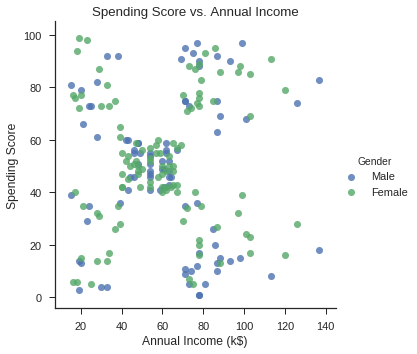

In [21]:
# Set style of scatterplot

sns.set_context("notebook", font_scale=1.1)
sns.set_style("ticks")

# Create scatterplot of dataframe
sns.lmplot('Annual Income (k$)', # Horizontal axis
           'Spending Score (1-100)', # Vertical axis
           data=df, # Data source
           hue='Gender', # Different color markers for 'Male' & 'Female'
           fit_reg=False, # Don't fix a regression line
           scatter_kws={"marker": "D", # Set marker style
                        "s": 50, }) # S marker size

#sns.plt.show()


# Set title
plt.title('Spending Score vs. Annual Income')

# Set x-axis label
plt.xlabel('Annual Income (k$)')

# Set y-axis label
plt.ylabel('Spending Score')

### Let's produce a scatter plot of age vs. spending score...

Text(39.3269079166667, 0.5, 'Spending Score')

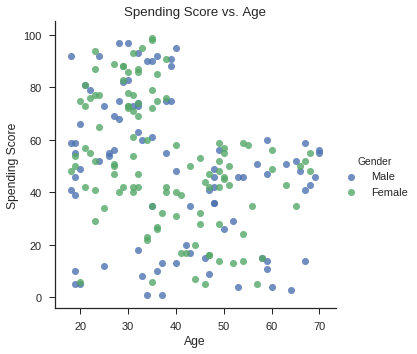

In [22]:
# Set style of scatterplot

sns.set_context("notebook", font_scale=1.1)
sns.set_style("ticks")

# Create scatterplot of dataframe
sns.lmplot('Age', # Horizontal axis
           'Spending Score (1-100)', # Vertical axis
           data=df, # Data source
           hue = 'Gender', # Different color markers for 'Male' & 'Female'
           fit_reg=False, # Don't fix a regression line
           scatter_kws={"marker": "D", # Set marker style
                        "s": 50}) # S marker size

# Set title
plt.title('Spending Score vs. Age')

# Set x-axis label
plt.xlabel('Age')

# Set y-axis label
plt.ylabel('Spending Score')

### Let's change the column 'Gender' to a categorical variable and then code it.

In [23]:
df['Gender'] = df['Gender'].astype('category')
df['Gender'] = df['Gender'].cat.codes
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Gender Color,Age Groups,Income Groups,Spending Score Groups
CustomerID,,,,,,,,
1,1,19,15,39,#9b59b6,"(10, 20]","(10, 20]","(30, 40]"
2,1,21,15,81,#9b59b6,"(20, 30]","(10, 20]","(80, 90]"
3,0,20,16,6,#3498db,"(10, 20]","(10, 20]","(0, 10]"
4,0,23,16,77,#3498db,"(20, 30]","(10, 20]","(70, 80]"
5,0,31,17,40,#3498db,"(30, 40]","(10, 20]","(30, 40]"


### Let's get a histogram distribution of annual income.




Text(0.5, 1.0, 'Histogram - Annual Income')

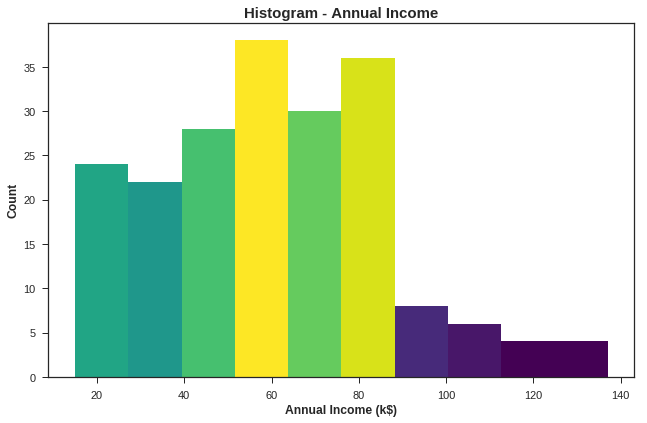

In [24]:
n_bins = 10
x = df['Annual Income (k$)']

fig, axs = plt.subplots()
fig.set_size_inches(10.5, 6.5)

# N is the count in each bin, bins is the lower-limit of the bin
N, bins, patches = axs.hist(x, bins=n_bins)

# We'll color code by height, but you could use any scalar
fracs = N / N.max()

# we need to normalize the data to 0..1 for the full range of the colormap
norm = colors.Normalize(fracs.min(), fracs.max())

# Now, we'll loop through our objects and set the color of each accordingly
for thisfrac, thispatch in zip(fracs, patches):
    color = plt.cm.viridis(norm(thisfrac))
    thispatch.set_facecolor(color)
    
# sns.set_context("notebook", font_scale=1.1)
# sns.set_style("ticks")    
    
plt.xlabel('Annual Income (k$)',fontweight='bold')
plt.ylabel('Count',fontweight='bold')
plt.title('Histogram - Annual Income',fontsize = 15,fontweight='bold')

### Let's plot a histogram of the age distribution.

Text(0.5, 1.0, 'Histogram - Age')

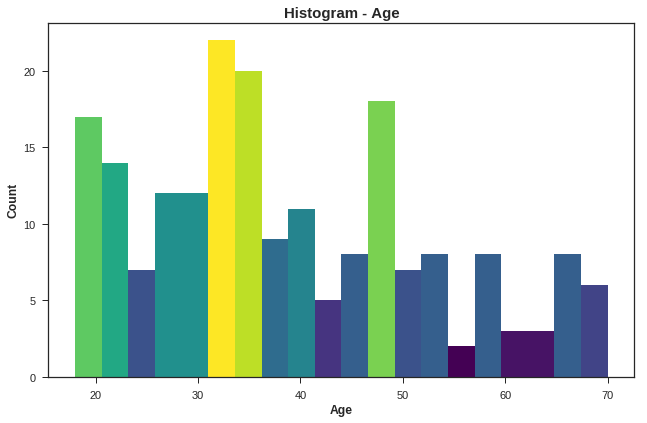

In [25]:
n_bins = 20
x = df['Age']

fig, axs = plt.subplots()
fig.set_size_inches(10.5, 6.5)

# N is the count in each bin, bins is the lower-limit of the bin
N, bins, patches = axs.hist(x, bins=n_bins)

# We'll color code by height, but you could use any scalar
fracs = N / N.max()

# we need to normalize the data to 0..1 for the full range of the colormap
norm = colors.Normalize(fracs.min(), fracs.max())

# Now, we'll loop through our objects and set the color of each accordingly
for thisfrac, thispatch in zip(fracs, patches):
    color = plt.cm.viridis(norm(thisfrac))
    thispatch.set_facecolor(color)
    
# sns.set_context("notebook", font_scale=1.1)
# sns.set_style("ticks") 
    
plt.xlabel('Age',fontweight='bold')
plt.ylabel('Count',fontweight='bold')
plt.title('Histogram - Age',fontsize = 15,fontweight='bold')

### Let's plot a histogram of the spending score.

Text(0.5, 1.0, 'Histogram - Spending Score')

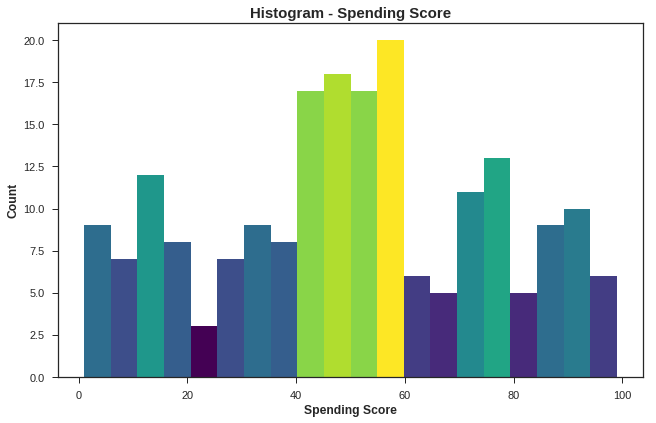

In [26]:
n_bins = 20
x = df['Spending Score (1-100)']

fig, axs = plt.subplots()
fig.set_size_inches(10.5, 6.5)

# N is the count in each bin, bins is the lower-limit of the bin
N, bins, patches = axs.hist(x, bins=n_bins)

# We'll color code by height, but you could use any scalar
fracs = N / N.max()

# we need to normalize the data to 0..1 for the full range of the colormap
norm = colors.Normalize(fracs.min(), fracs.max())

# Now, we'll loop through our objects and set the color of each accordingly
for thisfrac, thispatch in zip(fracs, patches):
    color = plt.cm.viridis(norm(thisfrac))
    thispatch.set_facecolor(color)
    
sns.set_context("notebook", font_scale=1.1)
sns.set_style("ticks")    
    
plt.xlabel('Spending Score',fontweight='bold')
plt.ylabel('Count',fontweight='bold')
plt.title('Histogram - Spending Score',fontsize = 15,fontweight='bold')

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 8 columns):
Gender                    200 non-null int8
Age                       200 non-null int64
Annual Income (k$)        200 non-null int64
Spending Score (1-100)    200 non-null int64
Gender Color              200 non-null object
Age Groups                200 non-null category
Income Groups             200 non-null category
Spending Score Groups     200 non-null category
dtypes: category(3), int64(3), int8(1), object(1)
memory usage: 19.0+ KB


### Separate the dataset into train and test sets....

In [0]:
from sklearn.model_selection import train_test_split

y=df['Spending Score (1-100)']
X = df[['Gender','Age','Annual Income (k$)']].copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

### Use sklearn's StandardScaler to feature scale X_train and y.

In [29]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train_mean = scaler.mean_
X_train_std_dev = scaler.scale_
print(X_train_mean,X_train_std_dev)

[ 0.47014925 38.88059701 60.76865672] [ 0.49910814 14.05057219 27.2188242 ]


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)


In [30]:
y_train = y_train.reshape(-1,1)
scaler.fit(y_train)
y_train_mean = scaler.mean_
y_train_std_dev = scaler.scale_
print(y_train_mean,y_train_std_dev)

[51.13432836] [26.39843704]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
